# Module 5, Activity 2: Visualising a Network of News Media

In this activity, you're going to use what you learned in the last activity to visualise a small network. We will use real data about media organisations in this activity. The dataset contains information about the hyperlinks and mentions between online media outlets.

Let's start by loading our libraries and the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx # for dealing with network data

# importing data from csv
media_nodes = pd.read_csv("data/Dataset1-Media-Example-NODES.csv", index_col='id') # choose the index column up front
# Note: if you don't specify the index column up front you can define it later using
# df.set_index(col_name) e.g. media_verticies.set_index('id')

media_edges = pd.read_csv("data/Dataset1-Media-Example-EDGES.csv")

We've loaded two datasets - one with nodes and one with edges. Let's take a quick look at our data.

In [2]:
media_nodes

,media,media_type,type_label,audience_size
id,,,,
s01,NY Times,1,Newspaper,20
s02,Washington Post,1,Newspaper,25
s03,Wall Street Journal,1,Newspaper,30
s04,USA Today,1,Newspaper,32
s05,LA Times,1,Newspaper,20
s06,New York Post,1,Newspaper,50
s07,CNN,2,TV,56
s08,MSNBC,2,TV,34
s09,FOX News,2,TV,60


In [3]:
media_edges.head()

,from,to,type,weight
0,s01,s02,hyperlink,22
1,s01,s03,hyperlink,22
2,s01,s04,hyperlink,21
3,s01,s15,mention,20
4,s02,s01,hyperlink,23


Our nodes dataset contains 17 nodes, each from a different media source. We have three media types - newspaper, TV and online. We also have a measure of each media source's audience size. 

The edges dataset contains information on source and target nodes (from and to columns), the type of connection between nodes, and their weight. The weights represent the number of people who clicked on a hyperlink to go from one node to another (hyperlink), as well as the number of times the source node was mentioned in the target node media (mention). 

At the moment, these are just Pandas data frames. We need to convert them into a graph object to visualise using networkx. Networkx has dozens of functions to convert different sources of data into the right format for network visualisation (see [here](https://networkx.org/documentation/stable/reference/convert.html)). Here, we're going to use the [**from_pandas_edgelist**](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html#networkx.convert_matrix.from_pandas_edgelist) function. Let's create our graph object and visualise it.

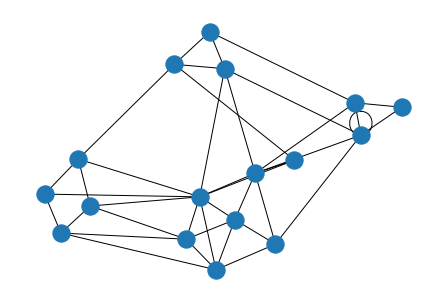

In [4]:
# create graph object from pandas dataframe, retain all attributes
G1 = nx.from_pandas_edgelist(df=media_edges, # dataframe
                             source='from', # name of source column
                             target='to', # name of target column
                             edge_attr=True) # We want to keep all columns in media_edges as edge attributes (type and weight)

fig = plt.figure()
nx.draw(G1)
plt.show()

What about our node information? We can add it to our graph object using the [**set_node_attributes**](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html) function. Note that we feed our node attribute information - the media_nodes dataframe - to the **set_node_attributes** function as a dictionary object.

In [5]:
# Add node arttribute information
node_dict = media_nodes.to_dict('index') # converting dataframe to dictionary
# Note:'index' was defined as the 'id' column when we originally imported the csv file
nx.set_node_attributes(G=G1,values=node_dict) # Add node attribute information via ditionary

We can call our edge and node attributes using networkx functions:

In [6]:
G1.edges.data()

EdgeDataView([('s01', 's02', {'type': 'hyperlink', 'weight': 23}), ('s01', 's03', {'type': 'hyperlink', 'weight': 21}), ('s01', 's04', {'type': 'hyperlink', 'weight': 21}), ('s01', 's15', {'type': 'hyperlink', 'weight': 22}), ('s01', 's05', {'type': 'mention', 'weight': 1}), ('s02', 's03', {'type': 'hyperlink', 'weight': 21}), ('s02', 's09', {'type': 'hyperlink', 'weight': 1}), ('s02', 's10', {'type': 'hyperlink', 'weight': 5}), ('s02', 's05', {'type': 'hyperlink', 'weight': 21}), ('s03', 's04', {'type': 'hyperlink', 'weight': 23}), ('s03', 's05', {'type': 'hyperlink', 'weight': 1}), ('s03', 's08', {'type': 'hyperlink', 'weight': 2}), ('s03', 's10', {'type': 'hyperlink', 'weight': 2}), ('s03', 's11', {'type': 'hyperlink', 'weight': 1}), ('s03', 's12', {'type': 'hyperlink', 'weight': 1}), ('s03', 's07', {'type': 'mention', 'weight': 1}), ('s04', 's06', {'type': 'mention', 'weight': 1}), ('s04', 's11', {'type': 'mention', 'weight': 22}), ('s04', 's12', {'type': 'hyperlink', 'weight': 3})

In [7]:
G1.nodes.data()

NodeDataView({'s01': {'media': 'NY Times', 'media_type': 1, 'type_label': 'Newspaper', 'audience_size': 20}, 's02': {'media': 'Washington Post', 'media_type': 1, 'type_label': 'Newspaper', 'audience_size': 25}, 's03': {'media': 'Wall Street Journal', 'media_type': 1, 'type_label': 'Newspaper', 'audience_size': 30}, 's04': {'media': 'USA Today', 'media_type': 1, 'type_label': 'Newspaper', 'audience_size': 32}, 's15': {'media': 'NYTimes.com', 'media_type': 3, 'type_label': 'Online', 'audience_size': 24}, 's09': {'media': 'FOX News', 'media_type': 2, 'type_label': 'TV', 'audience_size': 60}, 's10': {'media': 'ABC', 'media_type': 2, 'type_label': 'TV', 'audience_size': 23}, 's05': {'media': 'LA Times', 'media_type': 1, 'type_label': 'Newspaper', 'audience_size': 20}, 's08': {'media': 'MSNBC', 'media_type': 2, 'type_label': 'TV', 'audience_size': 34}, 's11': {'media': 'BBC', 'media_type': 2, 'type_label': 'TV', 'audience_size': 34}, 's12': {'media': 'Yahoo News', 'media_type': 3, 'type_labe

Let's step through encoding node and edge attributes with colour and size, to create a network visualisation of these different media sources. We're going to do four things:

1) Label nodes with their media name.\
2) Add edge weights.\
3) Scale each node by its audience size.\
4) Colour nodes by whether they are a newspaper, a website or a TV network.

We'll also make changes to other figure attributes or aesthetics as we need, to make our visualisation more readable. As we go, we'll highlight any new functions we're using - you can find more information about how they work by searching for them in the networkx [reference material](https://networkx.org/documentation/stable/). 

Let's get started. Remember in the last activity that we could subset our nodes and edges, then draw each subset seperately? We're going to do much the same thing here. To add network labels, we're going to use the **draw_networkx_labels** function, but call it after we've drawn our base network. Note how we call the labels using **get_node_attributes** too.

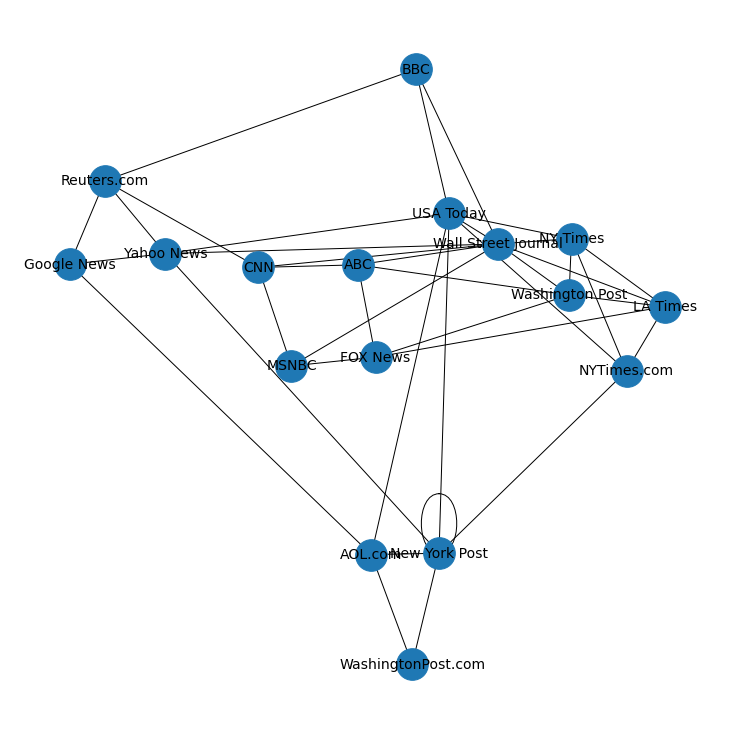

In [8]:
fig = plt.figure(figsize=(10,10))
pos=nx.spring_layout(G1,seed=4) #setting up positional paramters for reproducibility of graph, this could be any relevant setup, but the seed keeps it consistent
nx.draw(G1, pos = pos,
       node_size=1000) # make nodes bigger, for readability
nx.draw_networkx_labels(G=G1,pos=pos,
labels=nx.get_node_attributes(G1,'media'), font_size = 14) # set labels to node attribute 'media'
plt.show()

**Exercise:** 
1) Even with a larger figure size, node labels can still overlap. Change the seed value in spring_layout until you get a network structure you are happy with, where no labels overlap or get cut off at the edge of the figure.\
2) Relabel the nodes, but by their media type.

Next, let's add edge weights. We did this in the last activity, but note how we're rescaling our line widths to be be at most 2. If we just set the line widths to be the weights without rescaling, the lines would be enormous and the figure unreadable. Let's also add edge arrows too, so we can see who is referencing whom. We'll also change the font weight of our node labels for readability.

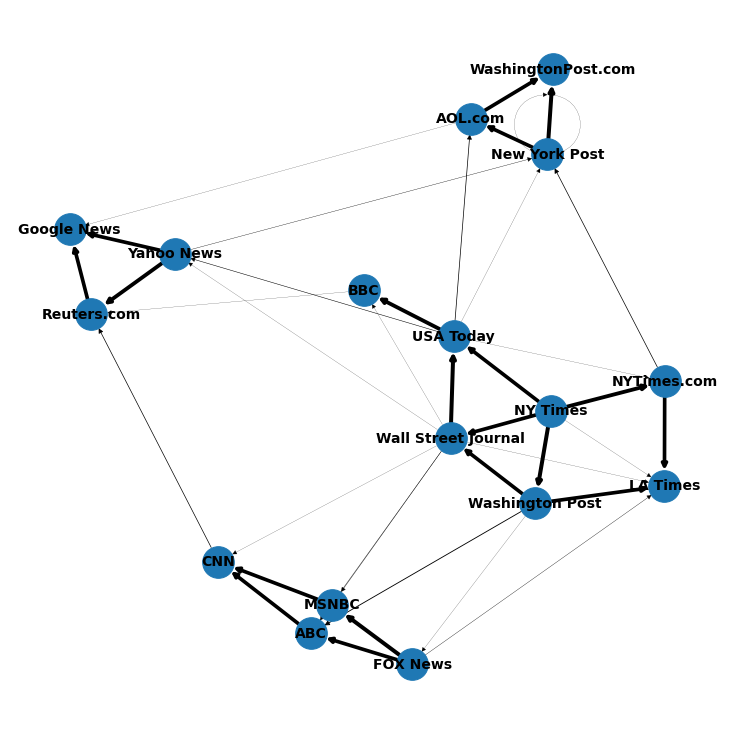

In [9]:
w=nx.get_edge_attributes(G1,'weight') 
w_list=list(w.values()) # return weights as list

# scale weights to be at most 2 
line_width_max=4 # Maximum line width
OldMax=max(w_list) # Maximum weight
w_norm = [line_width_max/OldMax*value for value in w_list] # This is a list comprehension to scale weights to be at most 2

fig = plt.figure(figsize=(10,10))
pos=nx.spring_layout(G1,seed=6) #setting up positional paramters for reproducibility of graph, this could be any relevant setup, but the seed keeps it consistent
nx.draw(G1, pos = pos, 
       node_size=1000,
        width = w_norm, # Set width of edges
        arrows = True) # Draw arrows
nx.draw_networkx_labels(G=G1,pos=pos,labels=nx.get_node_attributes(G1,'media'), # set labels to node attribute 'media'
                        font_size = 14, font_weight = "bold") 
plt.show()

**Exercise:** Experiment with the maximum width of the edges.

We can also add edge labels too if we wanted to explicitly mark the weight of each edge. Let's do that with the **draw_networkx_edge_labels** function.

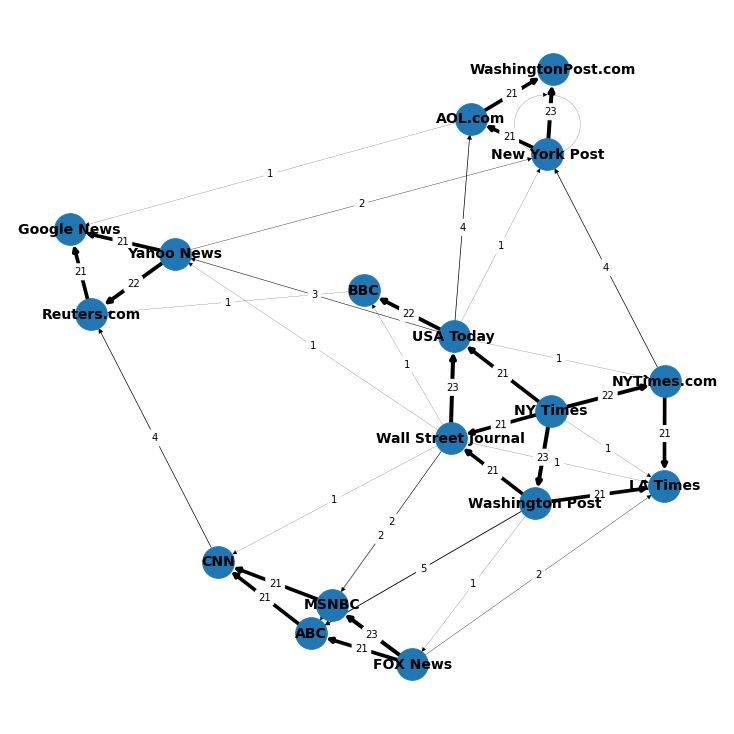

In [10]:
fig = plt.figure(figsize=(10,10))
pos=nx.spring_layout(G1,seed=6) #setting up positional paramters for reproducibility of graph, this could be any relevant setup, but the seed keeps it consistent
nx.draw(G1, pos = pos, 
       node_size=1000,
        width = w_norm, # Set the width
        arrows = True) # Draw arrows
nx.draw_networkx_edge_labels(G=G1, pos=pos, edge_labels=nx.get_edge_attributes(G1,'weight'), rotate = False)
nx.draw_networkx_labels(G=G1,pos=pos,labels=nx.get_node_attributes(G1,'media'), # set labels to node attribute 'media'
                        font_size = 14, font_weight = "bold") 
plt.show()

Even without the edge labels we can start to use the visualisation to see how often different media sources are referencing each other. For example, FOX News references MSNBC and ABC, and they in turn reference only CNN. We can also see how the NY Times references only USA Today, NYTimes.com and the Washington Post.

We'll leave the edge labels out from here, since the figure is starting to look a bit cluttered with text. You can keep them in if you want though. Next, let's scale the size of the nodes by their audience size. We'll scale the node size using a list of values created by a list comprehension, so that the minimum node size (corresponding to the smallest audience) is 500.

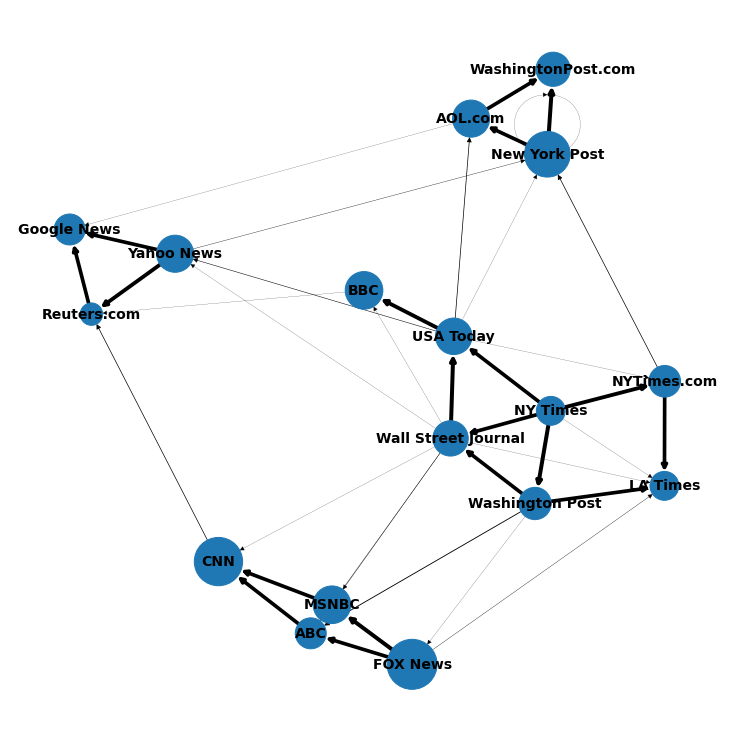

In [12]:
min_node_size = 500 # minimum node size
audience=nx.get_node_attributes(G1,'audience_size') # audience size for each node
audience_list=list(audience.values()) # audience size for each node as a list, so we can do list comprehension
min_audience=min(audience_list) # minimum audience size
audience_norm = [value/min_audience*min_node_size for value in audience_list] # This is a list comprehension to scale nodes to be at least 1000

fig = plt.figure(figsize=(10,10))
pos=nx.spring_layout(G1,seed=6) #setting up positional paramters for reproducibility of graph, this could be any relevant setup, but the seed keeps it consistent
nx.draw(G1, pos = pos, 
        width = w_norm,
        node_size = audience_norm, # Set node size using audience_norm list
        arrows = True) # Set the width
nx.draw_networkx_labels(G=G1,pos=pos,labels=nx.get_node_attributes(G1,'media'), # set labels to node attribute 'media'
                        font_size = 14, font_weight = "bold") 
plt.show()

**Exercises:** 
1) Experiment with the minimum node size.\
2) Which media channel has the largest audience? Which one has the smallest?

Finally, let's colour our nodes by media type. We'll also need a legend to decode the colours. So, as in the last activity, we need to subset our nodes and plot using a for-loop. Note that we also need to build a subset for our node sizes as well.

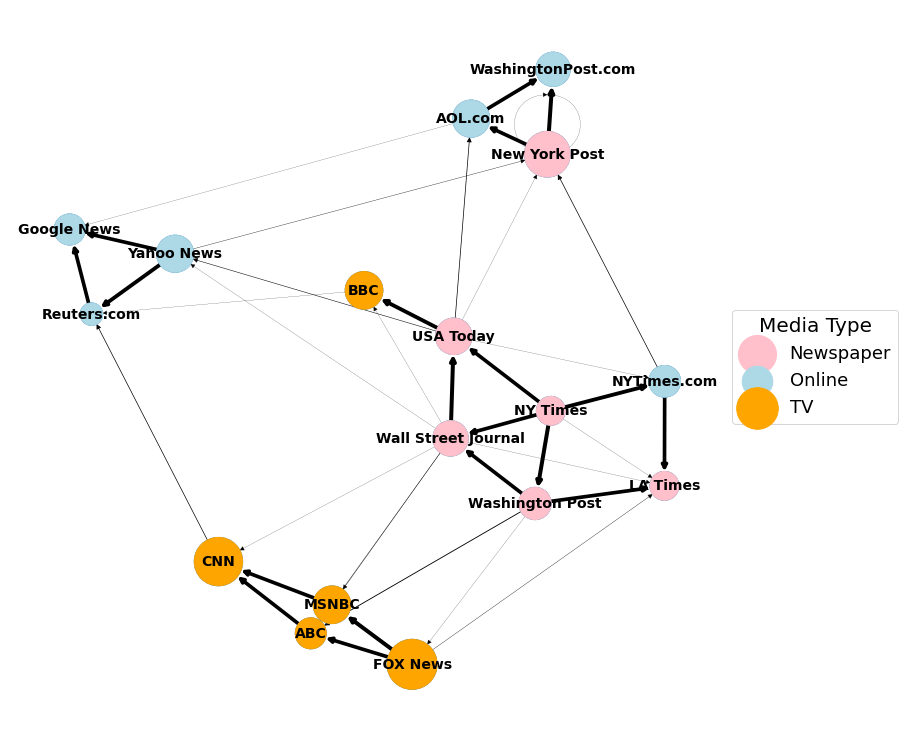

In [13]:
min_node_size = 500 # minimum node size
audience=nx.get_node_attributes(G1,'audience_size') # audience size for each node
audience_list=list(audience.values()) # audience size for each node as a list, so we can do list comprehension
min_audience=min(audience_list) # minimum audience size
audience_norm = [value/min_audience*min_node_size for value in audience_list] # This is a list comprehension to scale nodes to be at least 1000

### Media labels and colours for node vis. for-loop
media_labels = list(set(nx.get_node_attributes(G1,"type_label").values())) # Find the set of type_labels (finds all unique values)
media_colours = ["pink", "lightblue", "orange"]

fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos=nx.spring_layout(G1,seed=6) #setting up positional paramters for reproducibility of graph, this could be any relevant setup, but the seed keeps it consistent
nx.draw(G1, pos = pos, 
        width = w_norm,
        node_size = audience_norm, # Set node size using audience_norm list
        arrows = True) # Set the width
nx.draw_networkx_labels(G=G1,pos=pos,labels=nx.get_node_attributes(G1,'media'), # set labels to node attribute 'media'
                        font_size = 14, font_weight = "bold") 

for i in range(0,len(media_labels)): # Loop over media types, adding media type nodes to our network vis. in each loop
    curr_node_list = [] # Start with empty list
    curr_node_size = [] # Empty list of node sizes
    for node in G1.nodes: # For each node
        if G1.nodes[node]["type_label"] == media_labels[i]: # If you're in the current company
            curr_node_list.append(node) # You're in the node list
            curr_node_size.append(G1.nodes[node]["audience_size"]/min_audience*min_node_size) # Add appended node size, normalised by minimum audience
            
    #For each community list, draw the nodes, over our full network, giving them a specific colour.
    # Notice that we have given each of these plot objects a label, we need this when we build the axes legend
    # as we've seen in previous modules with Matplotlib
    nx.draw_networkx_nodes(G1, pos, nodelist=curr_node_list, node_color=media_colours[i], 
                           node_size = curr_node_size,
                           label = media_labels[i])  

    
lgnd = plt.legend(loc = "right", title = "Media Type", fontsize=18, title_fontsize=20, bbox_to_anchor=(1.25, 0.5))

plt.show()

Something weird is going on with the legend handles - they're all different sizes. This is because Matplotlib by default sets the size of each handle by the first node that has that colour. We can standardise them by manually setting the legend handle size. Let's set them to the minimum node size. We'll also add a title to our network visualisation while we're at it.

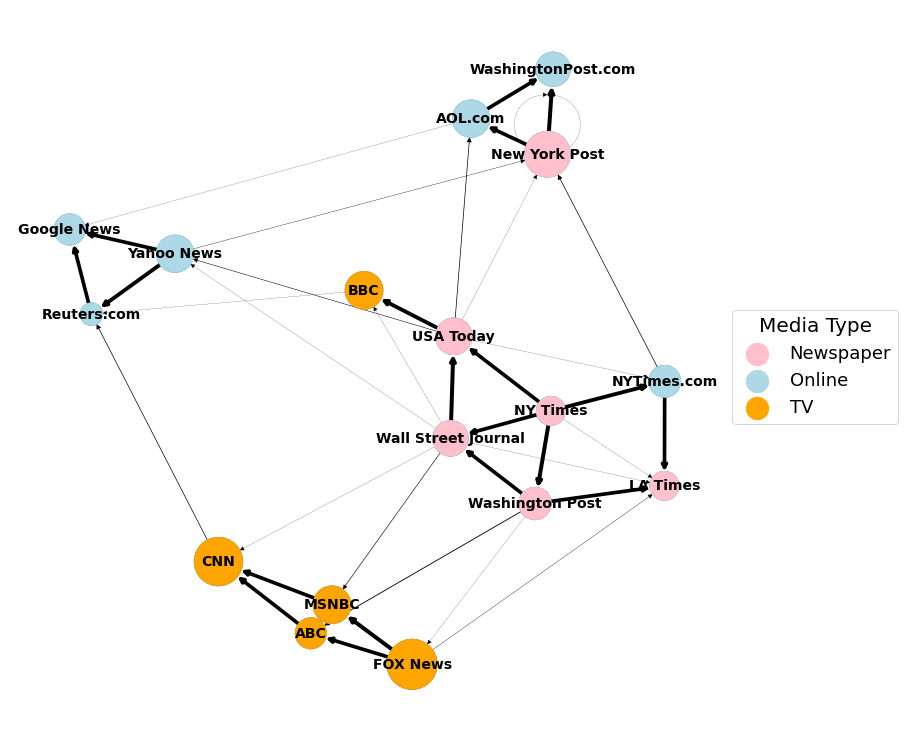

In [14]:
min_node_size = 500 # minimum node size
audience=nx.get_node_attributes(G1,'audience_size') # audience size for each node
audience_list=list(audience.values()) # audience size for each node as a list, so we can do list comprehension
min_audience=min(audience_list) # minimum audience size
audience_norm = [value/min_audience*min_node_size for value in audience_list] # This is a list comprehension to scale nodes to be at least 1000

### Media labels and colours for node vis. for-loop
media_labels = list(set(nx.get_node_attributes(G1,"type_label").values())) # Find the set of type_labels (finds all unique values)
media_colours = ["pink", "lightblue", "orange"]

fig = plt.figure(figsize = (10,10)) # figsize takes width and height arguments (inches)
pos=nx.spring_layout(G1,seed=6) #setting up positional paramters for reproducibility of graph, this could be any relevant setup, but the seed keeps it consistent
nx.draw(G1, pos = pos, 
        width = w_norm,
        node_size = audience_norm, # Set node size using audience_norm list
        arrows = True) # Set the width
nx.draw_networkx_labels(G=G1,pos=pos,labels=nx.get_node_attributes(G1,'media'), # set labels to node attribute 'media'
                        font_size = 14, font_weight = "bold") 

for i in range(0,len(media_labels)): # Loop over media types, adding media type nodes to our network vis. in each loop
    curr_node_list = [] # Start with empty list
    curr_node_size = [] # Empty list of node sizes
    for node in G1.nodes: # For each node
        if G1.nodes[node]["type_label"] == media_labels[i]: # If you're in the current company
            curr_node_list.append(node) # You're in the node list
            curr_node_size.append(G1.nodes[node]["audience_size"]/min_audience*min_node_size) # Add appended node size, normalised by minimum audience
            
    #For each community list, draw the nodes, over our full network, giving them a specific colour.
    # Notice that we have given each of these plot objects a label, we need this when we build the axes legend
    # as we've seen in previous modules with Matplotlib
    nx.draw_networkx_nodes(G1, pos, nodelist=curr_node_list, node_color=media_colours[i], 
                           node_size = curr_node_size,
                           label = media_labels[i])  

    
lgnd = plt.legend(loc = "right", title = "Media Type", fontsize=18, title_fontsize=20, bbox_to_anchor=(1.25, 0.5))

#change the marker size manually for the three legend handles
lgnd.legendHandles[0]._sizes = [min_node_size]
lgnd.legendHandles[1]._sizes = [min_node_size]
lgnd.legendHandles[2]._sizes = [min_node_size]

plt.show()

Very nice! What can we see from this network visualisation? From the node colours and edge widths, we can quickly see that media organisations are mostly clustered by their type, and they mostly mention only other media organisations within their type too.